# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.head(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


In [7]:
print(df_data.shape)

(4324, 9)


In [8]:
print(df_data.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [9]:
df_data.isna().any().any()

np.True_

In [10]:
df_data.isna().sum().sum()

np.int64(3360)

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [11]:
print(df_data.duplicated().any())

clean_df = df_data.drop_duplicates()
print(clean_df.shape) 

False
(4324, 9)


In [12]:
clean_df = df_data.dropna()
print(clean_df.shape)
clean_df.isna().any().any()

(964, 9)


np.False_

## Descriptive Statistics

In [13]:
num_df = clean_df['Price'].str.replace(',', "")
num_df = pd.to_numeric(num_df)
num_df.describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64

In [14]:
print(clean_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    964 non-null    int64 
 1   Unnamed: 0      964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB
None


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [15]:
df_graph = df_data.groupby('Organisation').count().iloc[:,0]
df_graph = df_graph.reset_index()
df_graph.columns = ['Organisation', 'LaunchCount']
df_graph = df_graph.sort_values(by=['LaunchCount'], ascending=False)
print(df_graph)


        Organisation  LaunchCount
40         RVSN USSR         1777
3        Arianespace          279
17  General Dynamics          251
7               CASC          251
35              NASA          203
52            VKS RF          201
49      US Air Force          161
48               ULA          140
6             Boeing          136
34   Martin Marietta          114
46            SpaceX          100
32               MHI           84
36          Northrop           83
31          Lockheed           79
23              ISRO           76
42         Roscosmos           55
19               ILS           46
45        Sea Launch           36
22              ISAS           30
28         Kosmotras           22
50           US Navy           17
13               ESA           13
21               ISA           13
14          Eurockot           13
41        Rocket Lab           13
5        Blue Origin           12
18               IAI           11
15            ExPace           10
2             

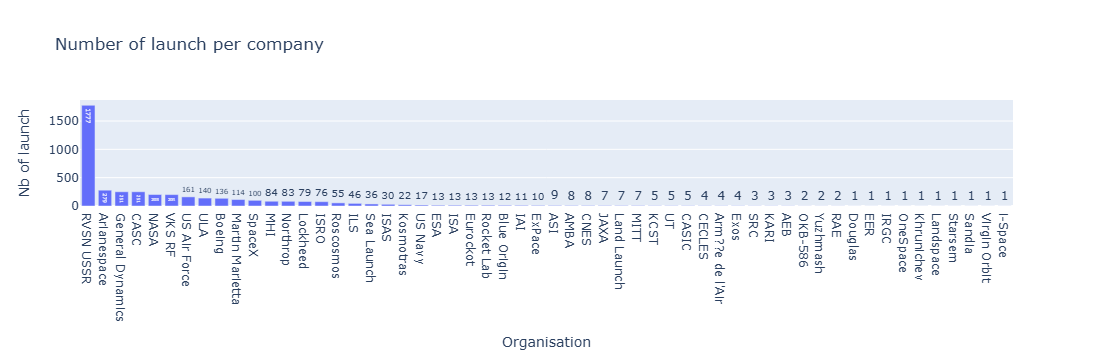

In [16]:
import matplotlib.pyplot as plt
import plotly.express as px

bar = px.bar(df_graph, x='Organisation', y='LaunchCount', text='LaunchCount', title='Number of launch per company')
bar.update_layout(yaxis_title='Nb of launch')
bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [17]:
status_df = df_data['Rocket_Status'].value_counts()

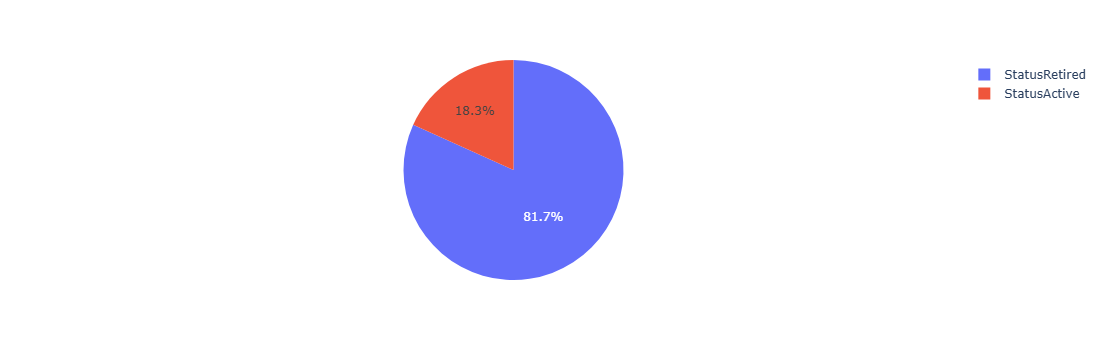

In [18]:
pie = px.pie(names=status_df.index, values=status_df.values, width=400)
pie.update_traces(textposition='inside')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [19]:
clean_df.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [20]:
status_df = df_data['Mission_Status'].value_counts()
status_df

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

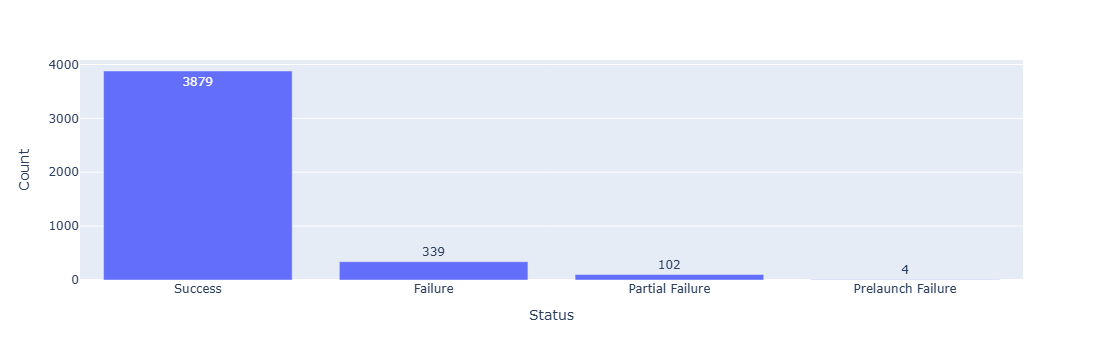

In [21]:
status_graph = px.bar(x=status_df.index, y=status_df.values, text=status_df.values, width=500)
status_graph.update_layout(yaxis_title='Count', xaxis_title='Status')

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [22]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    964 non-null    int64 
 1   Unnamed: 0      964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


In [23]:
clean_df.loc[:, 'Price']=clean_df['Price'].astype(str).str.replace(',', "")
clean_df.loc[:, 'Price']=clean_df['Price'].astype(str).str.replace('.0', "")
clean_df.loc[:,'Price']=clean_df['Price'].astype(float)

In [24]:
price_df = clean_df['Price'].value_counts().reset_index()
price_df.head(5)

,Price,count
0,450.00,136
1,200.00,75
2,40.00,55
3,62.00,41
4,30.80,38


In [25]:
px.bar(x=price_df['count'], y=price_df['Price'])

In [26]:
# Testing generating box without high values
clean_df[clean_df['Price'] >= 1160]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1916,1916,1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.00",Success
2000,2000,2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success
3149,3149,3149,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon May 14, 1973 17:30 UTC",Saturn V | Skylab 1,StatusRetired,"1,160.00",Success
3180,3180,3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Tue Dec 19, 1972 19:24 UTC",Saturn V | Apollo 17,StatusRetired,"1,160.00",Success
3243,3243,3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 16, 1972 17:54 UTC",Saturn V | Apollo 16,StatusRetired,"1,160.00",Success
3328,3328,3328,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Jul 26, 1971 13:34 UTC",Saturn V | Apollo 15,StatusRetired,"1,160.00",Success
3384,3384,3384,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Jan 31, 1971 21:03 UTC",Saturn V | Apollo 14,StatusRetired,"1,160.00",Success
3475,3475,3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Apr 11, 1970 19:13 UTC",Saturn V | Apollo 13,StatusRetired,"1,160.00",Success
3511,3511,3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Nov 14, 1969 16:22 UTC",Saturn V | Apollo 12,StatusRetired,"1,160.00",Success
3545,3545,3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jul 16, 1969 13:32 UTC",Saturn V | Apollo 11,StatusRetired,"1,160.00",Success


In [27]:
#It seems that the 5000 might be an error ? I decided to remove it
index = clean_df[clean_df['Price'] >= 1160].index
index.append(clean_df[clean_df['Price'] == 1160].index)
df_filtered = clean_df.iloc[~clean_df.index.isin(index)]

In [28]:
px.box(y=df_filtered['Price'], width=500)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [63]:
df_data.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [80]:
country_df = df_data['Location'].str.extract(r',([^,]+)$')[0]
country_df = country_df[1:]
country_df

0               USA
1             China
2               USA
3        Kazakhstan
4               USA
           ...     
4319            USA
4320            USA
4321            USA
4322     Kazakhstan
4323     Kazakhstan
Name: 0, Length: 4324, dtype: object

In [87]:
#df_data.insert(df_data.columns.get_loc('Location'), 'Country', country_df) 
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Country,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,USA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,China,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,USA,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,Kazakhstan,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,USA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [86]:
df_data.groupby('Country').count()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
Country,,,,,,,,,
Australia,6,6,6,6,6,6,6,0,6
Barents Sea,3,3,3,3,3,3,3,0,3
Brazil,3,3,3,3,3,3,3,0,3
China,268,268,268,268,268,268,268,158,268
France,303,303,303,303,303,303,303,95,303
Gran Canaria,2,2,2,2,2,2,2,2,2
India,76,76,76,76,76,76,76,67,76
Iran,13,13,13,13,13,13,13,0,13
Israel,11,11,11,11,11,11,11,0,11


In [110]:
# df_data['Country'] = df_data['Country'].replace('Barents Sea', 'Russia')
# df_data['Country'] = df_data['Country'].replace('Gran Canaria', 'Spain')
# df_data['Country'] = df_data['Country'].replace('New Mexico', 'USA')
# df_data['Country'] = df_data['Country'].replace('Pacific Missile Range Facility', 'USA')
# df_data['Country'] = df_data['Country'].replace('Shahrud Missile Test Site', 'Iran')
# df_data['Country'] = df_data['Country'].replace('Yellow Sea', 'China')

Index([920, 957, 1304], dtype='int64')

In [104]:
df_data.groupby('Country').count()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
Country,,,,,,,,,
Australia,6,6,6,6,6,6,6,0,6
Barents Sea,3,3,3,3,3,3,3,0,3
Brazil,3,3,3,3,3,3,3,0,3
China,268,268,268,268,268,268,268,158,268
France,303,303,303,303,303,303,303,95,303
Gran Canaria,2,2,2,2,2,2,2,2,2
India,76,76,76,76,76,76,76,67,76
Iran,13,13,13,13,13,13,13,0,13
Israel,11,11,11,11,11,11,11,0,11


# Use a Choropleth Map to Show the Number of Failures by Country


In [57]:
txt = "Hello, welcome to my world."

x = txt.rfind("e")

print(x)

13


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 